# Aim & Objective

In [ ]:
What is k- means clustering ?
 
k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations
into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), 
serving as a prototype of the cluster.


K-Means Algorithm

K means algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping 
subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar
as possible while also keeping the clusters as different (far) as possible.


# Algorithm

In [ ]:
The way k means algorithm works is as follows:
1.Specify number of clusters K.
2.Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids 
without replacement.( here k =3)
3.Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
4.Compute the sum of the squared distance between data points and    all centroids.
5.Assign each data point to the closest cluster (centroid).
6.Compute the centroids for the clusters by taking the average of all data points that belong to each cluster.
 
 
There are 3 steps:
    
Initialisation – K initial “means” (centroids) are generated at random
Assignment – K clusters are created by associating each observation with the nearest centroid
Update – The centroid of the clusters becomes the new mean

Assignment and Update are repeated iteratively until convergence
The end result is that the sum of squared errors is minimised between points and their respective centroids.
Let’s view it in action using k=3:


  # PROGRAM                                

In [ ]:
# Initialisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})
 
 
np.random.seed(200)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()



    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        26.925824        56.080300        56.727418        1     r
1  20  36        20.880613        48.373546        53.150729        1     r
2  28  30        14.142136        41.761226        53.338541        1     r
3  18  52        36.878178        50.990195        44.102154        1     r
4  29  54        38.118237        40.804412        34.058773        3     b


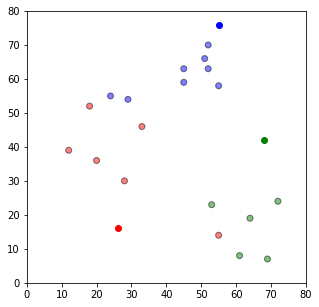

In [2]:
## Assignment Stage
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df
 
df = assignment(df, centroids)
print(df.head())
 
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()



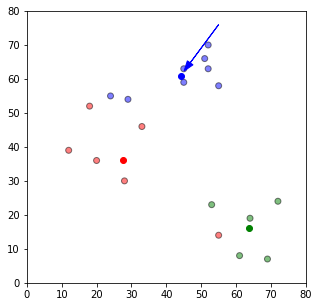

In [3]:
## Update Stage
import copy
old_centroids = copy.deepcopy(centroids)
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k
 
centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()


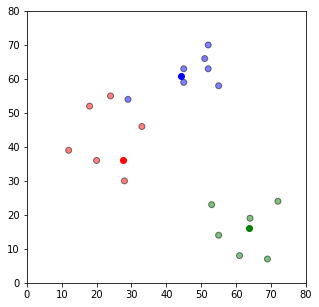

In [4]:
## Repeat Assignment Stage
df = assignment(df, centroids)
# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()


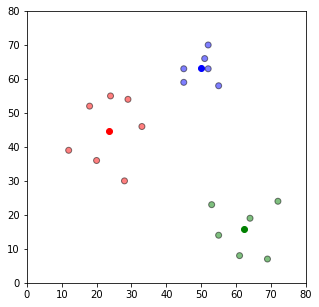

In [5]:
# Continue until all assigned categories don't change any more
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break
 
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

# CONCLUSION

So,we have successfully created three clusters from our random data set. All data clusters are shown in different colors. We can use the same code for making clusters on other data also and can even change the number of clusters in the algorithm. Also It is now clear that more centroids can improve the clustering. So after choosing more clusters we get better clusters with improved information again.
